In [45]:
import json
import re
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
games = json.load(open('data.json', 'r'))
data = pd.read_csv('survey_results.csv')

data.rename(columns={
    'Submission Date': 'submit_date', 
    'No Label': 'consent', 
    'Age': 'age', 
    'Gender': 'gender', 
    'Relationship status': 'rel_status',
    '"Video games are a good way to spend your free time"': 'video_games_in_free_time',
    'At what age did you own your first video game?': 'first_video_game',
    'Do you play video games regularly?': 'play_regularly',
    'If so, how much time on average do you play each week?': 'avg_play_time_weekly',
    'Do you think that video games are a good way to relieve stress?': 'games_relieve_stress',
    'How do video games affect a child\'s development?': 'games_affect_child_dev',
    'Mount & Blade II: Would you play this game to relax?': 'mount_blade_2_answer',
    'TEKKEN 7: Would you play this game to relax?': 'tekken_7_answer',
    'Muse Dash: Would you play this game to relax?': 'muse_dash_answer',
    'NBA 2K22: Would you play this game to relax?': 'nba_2k22_answer',
    'Shadowverse CCG: Would you play this game to relax?': 'shadowverse_ccg_answer',
    'Hunt: Showdown: Would you play this game to relax?': 'hunt_showdown_answer',
    'BLUE REFLECTION: Would you play this game to relax?': 'blue_reflection_answer',
    'A Way Out: Would you play this game to relax?': 'a_way_out_answer',
    'Russian Fishing 4: Would you play this game to relax?': 'russian_fishing_4_answer',
    'The Sims 4: Would you play this game to relax?': 'the_sims_4_answer',
    'Fall Guys: Would you play this game to relax?': 'fall_guys_answer',
    'Rust: Would you play this game to relax?': 'rust_answer',
    'Dead by Daylight: Would you play this game to relax?': 'dead_by_daylight_answer',
    'Terraria: Would you play this game to relax?': 'terraria_answer',
    'Metro Exodus: Would you play this game to relax?': 'metro_exodus_answer'
}, inplace=True)

data.head(2)

,submit_date,consent,age,gender,rel_status,video_games_in_free_time,first_video_game,play_regularly,avg_play_time_weekly,games_relieve_stress,...,hunt_showdown_answer,blue_reflection_answer,a_way_out_answer,russian_fishing_4_answer,the_sims_4_answer,fall_guys_answer,rust_answer,dead_by_daylight_answer,terraria_answer,metro_exodus_answer
0,2022/01/07 17:34:33,I have read the above disclaimer and agree to ...,24.0,Male,Other / Prefer not to disclose,1,9-13,No,0-4 Hours,Yes,...,No,Yes,No,Yes,Yes,No,No,No,No,No
1,2022/01/07 17:31:18,I have read the above disclaimer and agree to ...,24.0,Male,Single,1,9-13,No,0-4 Hours,Yes,...,No,No,No,No,No,No,Yes,No,No,No


In [3]:
_game_name = {
    'mount_blade_2': 'Mount & Blade II: Bannerlord',
    'tekken_7': 'TEKKEN 7',
    'muse_dash': 'Muse Dash',
    'nba_2k22': 'NBA 2K22',
    'shadowverse_ccg': 'Shadowverse CCG',
    'hunt_showdown': 'Hunt: Showdown',
    'blue_reflection': 'BLUE REFLECTION: Second Light',
    'a_way_out': 'A Way Out',
    'russian_fishing_4': 'Russian Fishing 4',
    'the_sims_4': 'The Sims 4',
    'fall_guys': 'Fall Guys: Ultimate Knockout',
    'rust': 'Rust',
    'dead_by_daylight': 'Dead by Daylight',
    'terraria': 'Terraria',
    'metro_exodus': 'Metro Exodus'
}

game_mapping = {}
for k,g in _game_name.items():
    game_mapping[k] = [x for x in games if x['game']['title'].lower() == g.lower()][0]

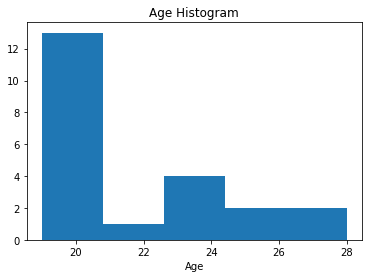

In [4]:
plt.figure()
plt.title('Age Histogram')
plt.hist(data.age, bins=5)
plt.xlabel('Age')
plt.show()

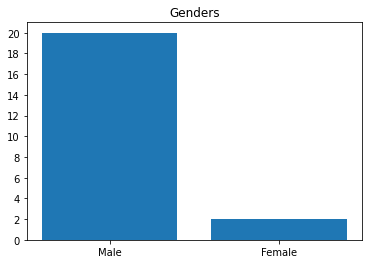

In [5]:
genders = data.gender.value_counts().to_dict()
plt.figure()
plt.title("Genders")
plt.yticks(range(0,22,2))
plt.bar(genders.keys(), genders.values())
plt.show()

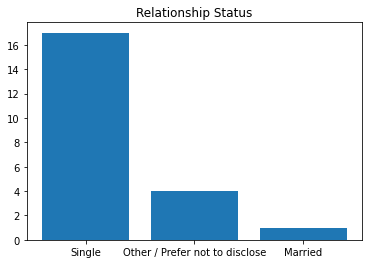

In [6]:
relationship_status = data.rel_status.value_counts().to_dict()
plt.figure()
plt.title("Relationship Status")
plt.bar(relationship_status.keys(), relationship_status.values())
plt.show()

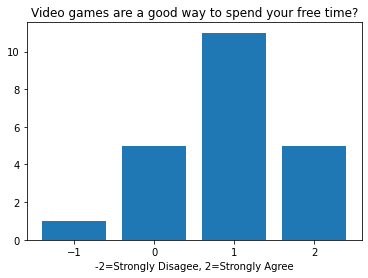

In [7]:
video_games_in_free_time = data.video_games_in_free_time.value_counts().to_dict()
plt.figure()
plt.title("Video games are a good way to spend your free time?")
plt.xticks([-2,-1,0,1,2])
plt.xlabel('-2=Strongly Disagee, 2=Strongly Agree')
plt.bar(video_games_in_free_time.keys(), video_games_in_free_time.values())
plt.show()

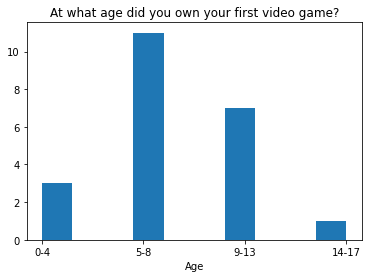

In [8]:
first_video_game_age_range = sorted(data.first_video_game, key=lambda x: int(re.match('\d+',x).group(0)))
plt.figure()
plt.title("At what age did you own your first video game?")
plt.xlabel('Age')
plt.hist(first_video_game_age_range)
plt.show()

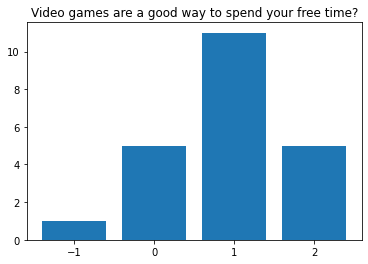

In [9]:
play_video_games = data.video_games_in_free_time.value_counts().to_dict()
plt.figure()
plt.title("Video games are a good way to spend your free time?")
plt.xticks([-2,-1,0,1,2])
plt.bar(play_video_games.keys(), play_video_games.values())
plt.show()

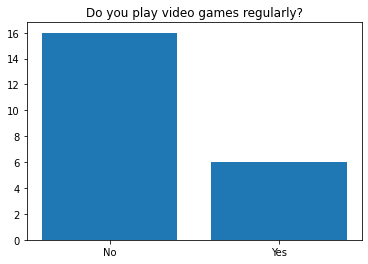

In [10]:
play_regularly = data.play_regularly.value_counts().to_dict()
plt.figure()
plt.title("Do you play video games regularly?")
plt.yticks(range(0,22,2))
plt.bar(play_regularly.keys(), play_regularly.values())
plt.show()

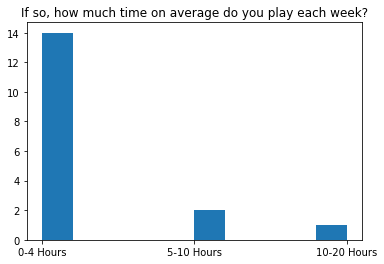

In [11]:
avg_play_time_weekly = sorted(data.avg_play_time_weekly.dropna(), key=lambda x: int(re.match('\d+',x).group(0)))
plt.figure()
plt.title("If so, how much time on average do you play each week?")
plt.hist(avg_play_time_weekly)
plt.show()

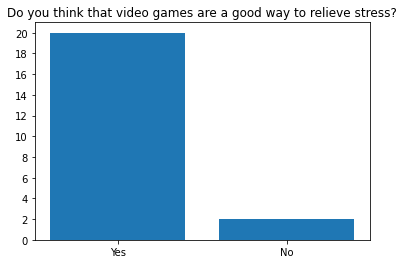

In [12]:
games_relieve_stress = data.games_relieve_stress.value_counts().to_dict()
plt.figure()
plt.title("Do you think that video games are a good way to relieve stress?")
plt.yticks(range(0,22,2))
plt.bar(games_relieve_stress.keys(), games_relieve_stress.values())
plt.show()

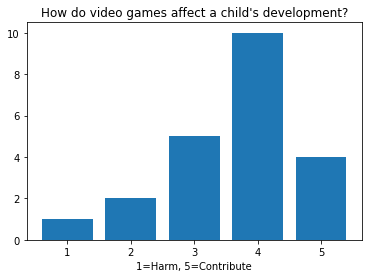

In [13]:
games_affect_child_dev = data.games_affect_child_dev.value_counts().to_dict()
plt.figure()
plt.title("How do video games affect a child's development?")
plt.xticks([1,2,3,4,5])
plt.xlabel('1=Harm, 5=Contribute')
plt.bar(games_affect_child_dev.keys(), games_affect_child_dev.values())
plt.show()

In [14]:
def extract_price(price_text):
    try:
        return int(re.search(r'([0-9,]+)', price_text).group(1).replace(',',''))
    except:
        return 0

for g in games:
    g['multiplayer'] = int('Multiplayer' in g['game']['tags'])
    g['online_pvp'] = int('Online PvP' in g['game']['features'])
    g['price'] = extract_price(g['game']['price'])
    g['mean_hrs_on_record'] = np.mean([r['hrs_on_record'] for r in g['reviews']])
    g['mean_review_rewards'] = np.mean([r['rewards'] for r in g['reviews']])
    g['mean_recommendations'] = np.mean([r['recommendation'] == 'Recommended' for r in g['reviews']])
    g['mean_review_length'] = np.mean([len(r['text']) for r in g['reviews']])


In [15]:
data.replace('Yes', True, inplace=True)
data.replace('No', False, inplace=True)

avg_relaxing = {}
for g in game_mapping:
    avg_relaxing[g] = data[g + "_answer"].mean()
avg_relaxing

{'mount_blade_2': 0.5454545454545454,
 'tekken_7': 0.36363636363636365,
 'muse_dash': 0.2727272727272727,
 'nba_2k22': 0.6363636363636364,
 'shadowverse_ccg': 0.22727272727272727,
 'hunt_showdown': 0.2727272727272727,
 'blue_reflection': 0.45454545454545453,
 'a_way_out': 0.45454545454545453,
 'russian_fishing_4': 0.6818181818181818,
 'the_sims_4': 0.6363636363636364,
 'fall_guys': 0.5909090909090909,
 'rust': 0.4090909090909091,
 'dead_by_daylight': 0.09090909090909091,
 'terraria': 0.7727272727272727,
 'metro_exodus': 0.36363636363636365}

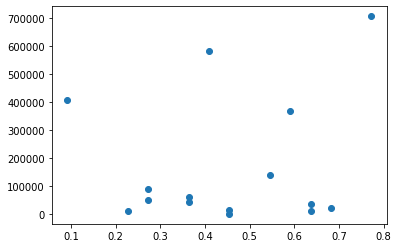

In [16]:
X = [(avg_relaxing[g], game_mapping[g]['game']['review_count']) for g in avg_relaxing]
x,y = zip(*X)

plt.figure()
plt.scatter(x, y)
plt.show()

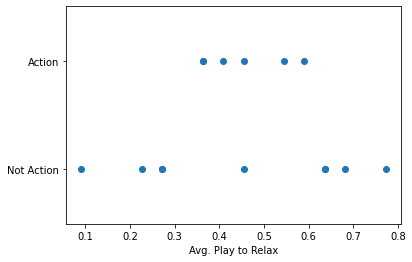

In [17]:
tag = 'Action'
X = [(avg_relaxing[g], tag in game_mapping[g]['game']['tags']) for g in avg_relaxing]
x,y = zip(*X)

plt.figure()
plt.scatter(x, y)
plt.yticks(ticks=[0,1], labels=['Not ' + tag, tag])
plt.ylim([-0.5,1.5])
plt.xlabel('Avg. Play to Relax')
plt.show()

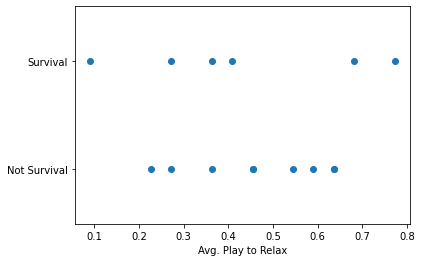

In [18]:
tag = 'Survival'
X = [(avg_relaxing[g], tag in game_mapping[g]['game']['tags']) for g in avg_relaxing]
x,y = zip(*X)

plt.figure()
plt.scatter(x, y)
plt.yticks(ticks=[0,1], labels=['Not ' + tag, tag])
plt.ylim([-0.5,1.5])
plt.xlabel('Avg. Play to Relax')
plt.show()

In [19]:
for g in games:
    print(g['game']['tags'])

['Medieval', 'Strategy', 'Open World', 'RPG', 'War', 'Multiplayer', 'Sandbox', 'Singleplayer', 'Action', 'Simulation', 'Moddable']
['Fighting', 'Action', 'Multiplayer', 'Competitive', 'Arcade', 'Local Multiplayer', 'Controller', 'Great Soundtrack', 'Sports', 'eSports']
['Music', 'Rhythm', 'Anime', 'Cute', 'Casual', 'Female Protagonist', 'Great Soundtrack', 'Sexual Content', 'Singleplayer', 'Indie']
['Sports', 'Basketball', 'Simulation', 'eSports', 'Realistic', 'Multiplayer', '3D', 'Singleplayer', 'Team-Based', 'Management', 'Trading']
['Free to Play', 'Card Battler', 'Trading Card Game', 'Deckbuilding', 'Card Game', 'Anime', 'Strategy', 'Multiplayer', 'Fantasy']
['Multiplayer', 'Hunting', 'FPS', 'Dark', 'Battle Royale', 'Perma Death', 'Western', 'Shooter', 'Survival', 'Zombies', 'Horror', 'PvP']
['RPG', 'Anime', 'Female Protagonist', 'Sexual Content', 'JRPG', 'Mature', 'Singleplayer', 'Nudity', 'LGBTQ+', 'Dating Sim']
['Co-op', 'Online Co-Op', 'Split Screen', 'Story Rich', 'Local Co-Op

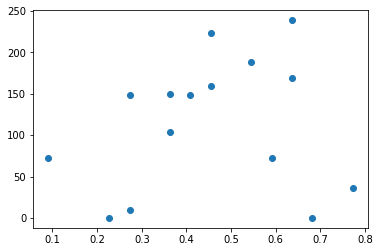

In [20]:
X = [(avg_relaxing[g], game_mapping[g]['price']) for g in avg_relaxing]
x,y = zip(*X)

plt.figure()
plt.scatter(x, y)
plt.show()

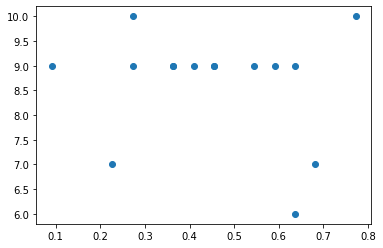

In [21]:
X = [(avg_relaxing[g], game_mapping[g]['game']['rating']) for g in avg_relaxing]
x,y = zip(*X)

plt.figure()
plt.scatter(x, y)
plt.show()

In [47]:
classification_questions = [x for x in data.columns if x.endswith('_answer')]

positive_rates = []
for id, row in data[classification_questions].iterrows():
    positive_rates.append(sum(row) / len(row))

positive_rates

[0.26666666666666666,
 0.2,
 0.6666666666666666,
 0.6666666666666666,
 0.5333333333333333,
 0.13333333333333333,
 0.4,
 0.13333333333333333,
 0.4,
 0.4666666666666667,
 0.4,
 0.4666666666666667,
 0.4,
 0.4666666666666667,
 0.26666666666666666,
 0.6666666666666666,
 0.5333333333333333,
 0.5333333333333333,
 0.8,
 0.4,
 0.5333333333333333,
 0.6]

In [61]:
personal_questions = [
    'video_games_in_free_time', 
    'first_video_game', 
    'play_regularly', 
    'avg_play_time_weekly', 
    'games_relieve_stress',
    'games_affect_child_dev'
]

_data = data.replace({
    '0-4 Hours': 4,
    '5-10 Hours': 10,
    '10-20 Hours': 20,
    '21+': 21,
    np.nan: 0,
    '0-4': 4,
    '5-8': 8,
    '9-13': 13,
    '14-17': 17,
    '18+': 18,
    'Yes': True,
    'No': False
})

_data[personal_questions]

,video_games_in_free_time,first_video_game,play_regularly,avg_play_time_weekly,games_relieve_stress,games_affect_child_dev
0,1,13,False,4,True,4
1,1,13,False,4,True,4
2,0,8,False,4,True,3
3,1,13,True,4,True,4
4,2,8,True,10,True,4
5,1,8,False,0,True,1
6,1,4,False,4,True,5
7,1,8,True,4,False,3
8,1,8,False,4,True,4
9,2,13,False,0,True,3


In [ ]:
plt.figure()
plt.scatter(_data.)